## Adult Census Income Prediction

### Introduction About the Data :

**The dataset** The goal is to predict whether a person has an income of more than 50K a year or not. (binary classification).

There are 14 independent variables :

* `age` : The age of an individual
* `workclass` : A general term to represent the employment status of an individual.
* `fnlwgt` : Final weight. In other words, this is the number of people the census believes
* `education` : The highest level of education achieved by an individual.
* `education-num` : The highest level of education achieved in numerical form.
* `marital-status` : Marital status of an individual. Married.civ.spouse corresponds to a civilian spouse while Married.AF.spouse is a spouse in the Armed Forces.
* `occupation` : the general type of occupation of an individual
* `relationship` : Represents what this individual is relative to others.
* `sex` : the biological sex of the individual
* `race` : Descriptions of an individual’s race
* `capital-gain` : capital gains for an individual
* `capital-loss` : capital loss for an individual
* `hours-per-week` : the hours an individual has reported to work per week
* `native-country` : country of origin for an individual

Target variable:
* `class`: whether or not an individual makes more than $50,000 annually.

Dataset Source Link :
[https://www.kaggle.com/datasets/overload10/adult-census-dataset](https://www.kaggle.com/datasets/overload10/adult-census-dataset)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset 
df = pd.read_csv("../data/census_dataset.csv")

In [3]:
# display the first 5 rows of DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Renaming the coloumn name
df.rename(columns= {'class': 'income'}, inplace=True)

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
# Check for any duplicate values in dataframe
df.duplicated().sum()

24

In [9]:
# Droping the duplicate values
df = df.drop_duplicates()

In [10]:
df.shape

(32537, 15)

In [11]:
# Divide the columns into categorical and numerical
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_data = [col for col in df.columns if df[col].dtypes != "O"]

In [12]:
# Check for how many unique values in categorical col
for i in categorical_cols:
    print(i, df[i].unique(), "Total : ", df[i].nunique())
    print('='*100)

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] Total :  9
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] Total :  16
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] Total :  7
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] Total :  15
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] Total :  6
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] Total :  5
sex [' Male' ' Fem

In [13]:
# there are leading spaces before every values in categorical_cols

for col in categorical_cols:
    df[col] = df[col].str.strip()

In [16]:
# Replace missing values
cat_1 = ['workclass', 'occupation', 'native-country']
for i in cat_1:
    df[i] = df[i].replace('?', np.nan)

In [17]:
# Check for total null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [18]:
df["occupation"].value_counts(dropna=False)

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [19]:
# fill null values with mode

df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [20]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
dtype: int64

In [21]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


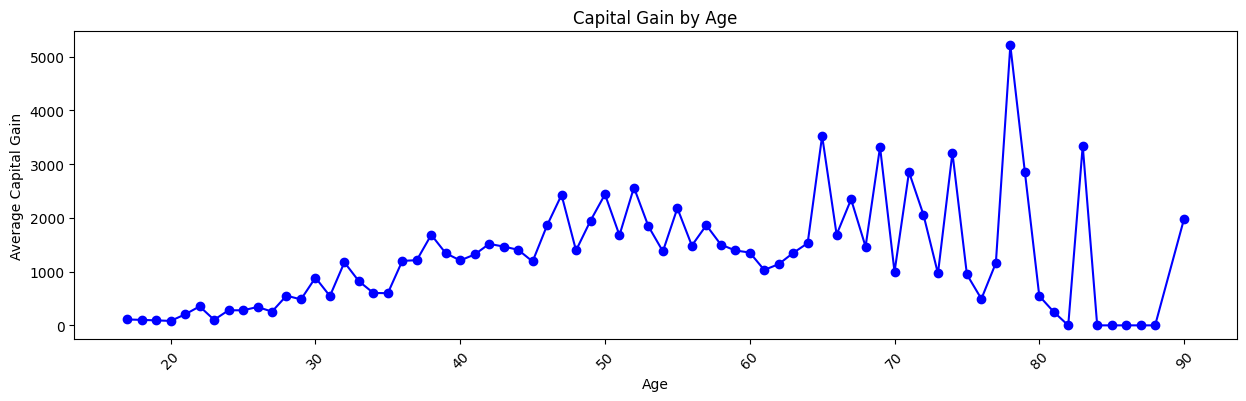

In [22]:
capital_gain_age = df.groupby('age')['capital-gain'].mean()
plt.figure(figsize=(15, 4))
capital_gain_age.plot(kind='line', marker='o', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Capital Gain')
plt.title('Capital Gain by Age')
plt.xticks(rotation=45)
plt.show()

There is a positive correlation between age and average capital gain. As age increases, the average capital gain tends to increase as well.

In [23]:
# Check for outliers using IQR
for i in numeric_data:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    outliers = df[(df[i] > upper) | (df[i] < lower)]
    print(i, "Range:", upper ,'to', lower)

age Range: 78.0 to -2.0
fnlwgt Range: 415742.0 to -60922.0
education-num Range: 16.5 to 4.5
capital-gain Range: 0.0 to 0.0
capital-loss Range: 0.0 to 0.0
hours-per-week Range: 52.5 to 32.5


In [24]:
# set the binary values to income column
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

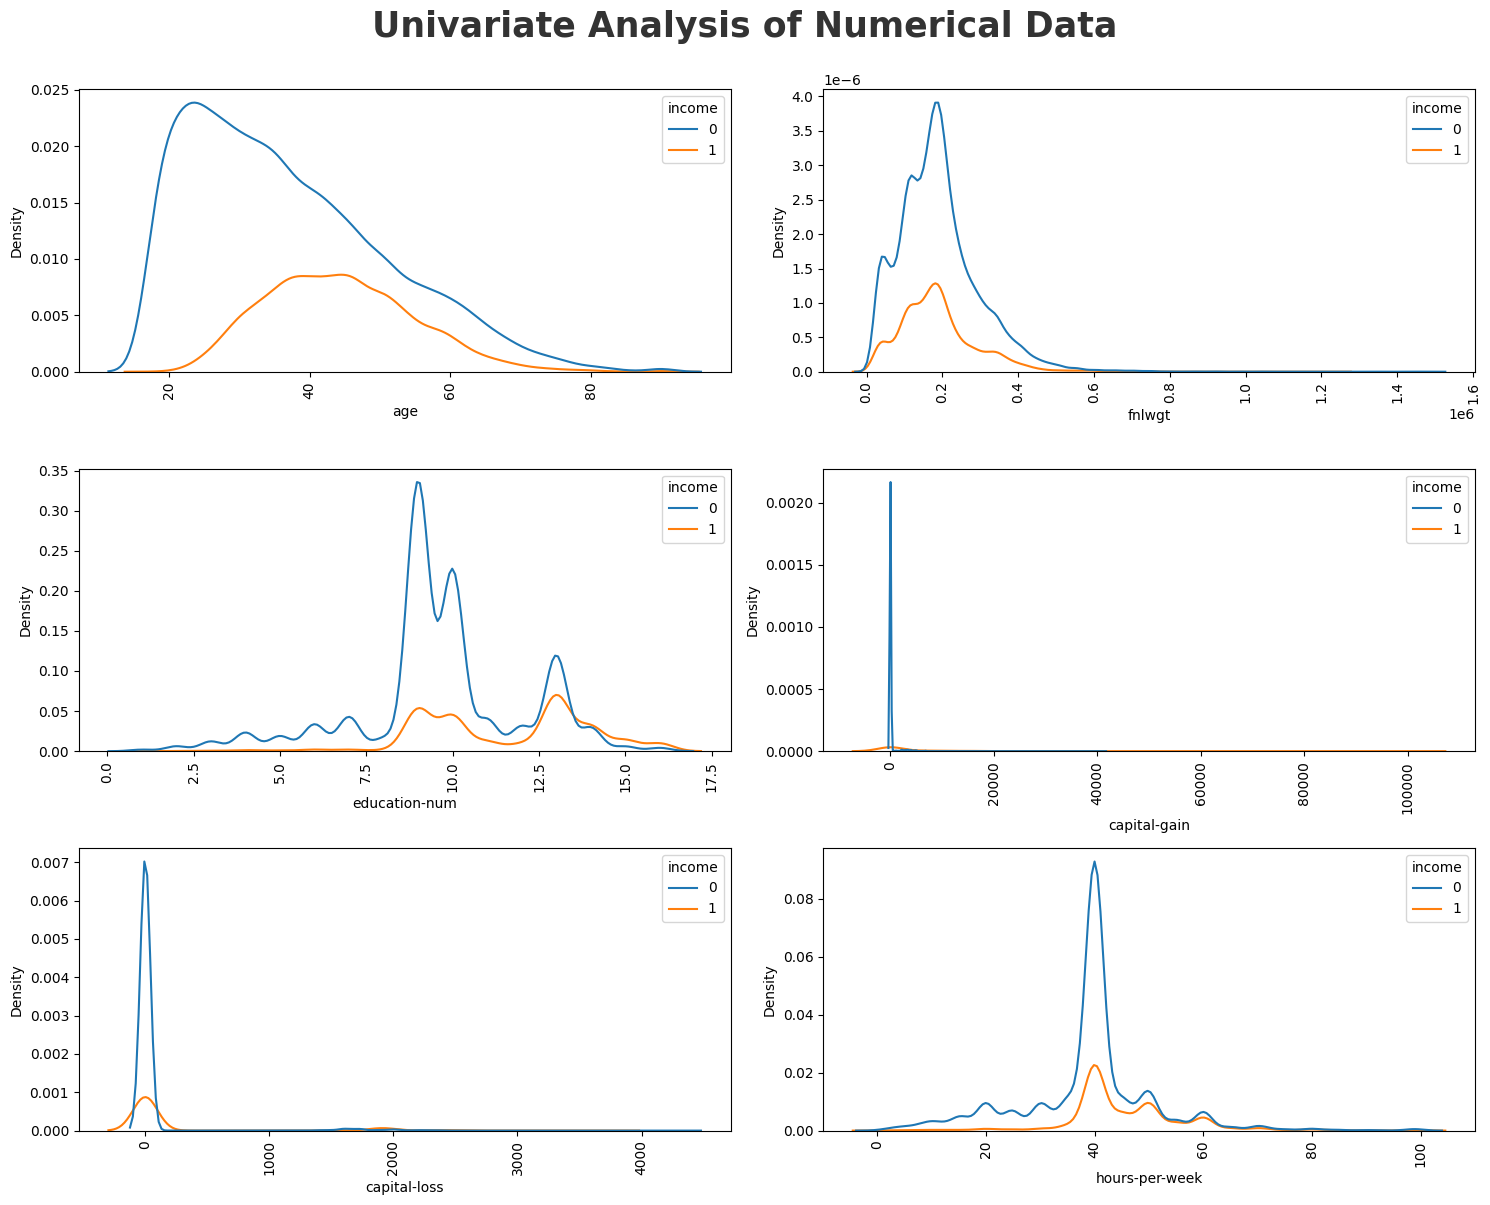

In [25]:
plt.figure(figsize=(15,12))
plt.suptitle("Univariate Analysis of Numerical Data", fontsize = 25, fontweight = "bold", alpha = 0.8, y=1)

for i in range(0, len(numeric_data)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = df[numeric_data[i]], data=df, hue="income", palette="tab10")
    plt.xlabel(numeric_data[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [26]:
# Calculate the correlation with respect to income
corr = df.corr(numeric_only=True)
corr_with_target = corr['income'].sort_values(ascending=False)
print(corr_with_target)

income            1.000000
education-num     0.335272
age               0.234037
hours-per-week    0.229658
capital-gain      0.223336
capital-loss      0.150501
fnlwgt           -0.009502
Name: income, dtype: float64


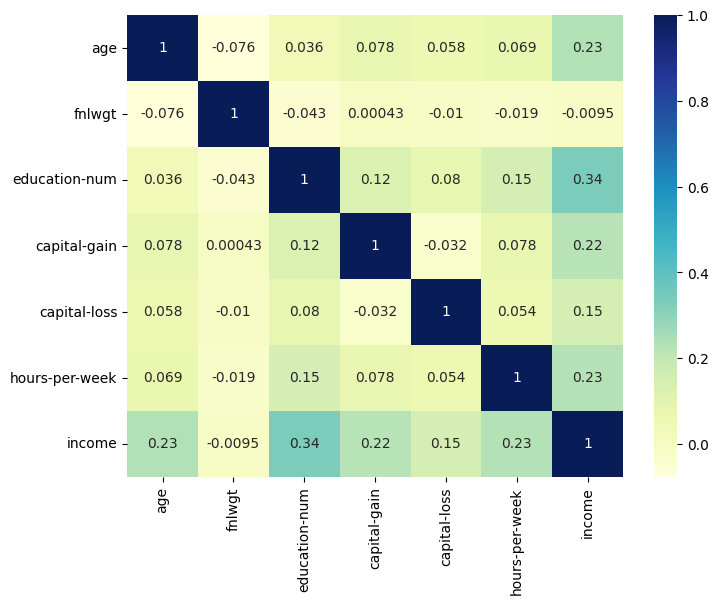

In [27]:
#Check for the correlation between different features using a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

After analyzing the correlation heatmap, we observed that there is no significant correlation between the 'income' and 'fnlwgt' variables. Considering this finding, we can conclude that the 'fnlwgt' variable may not contribute significantly to predicting income.

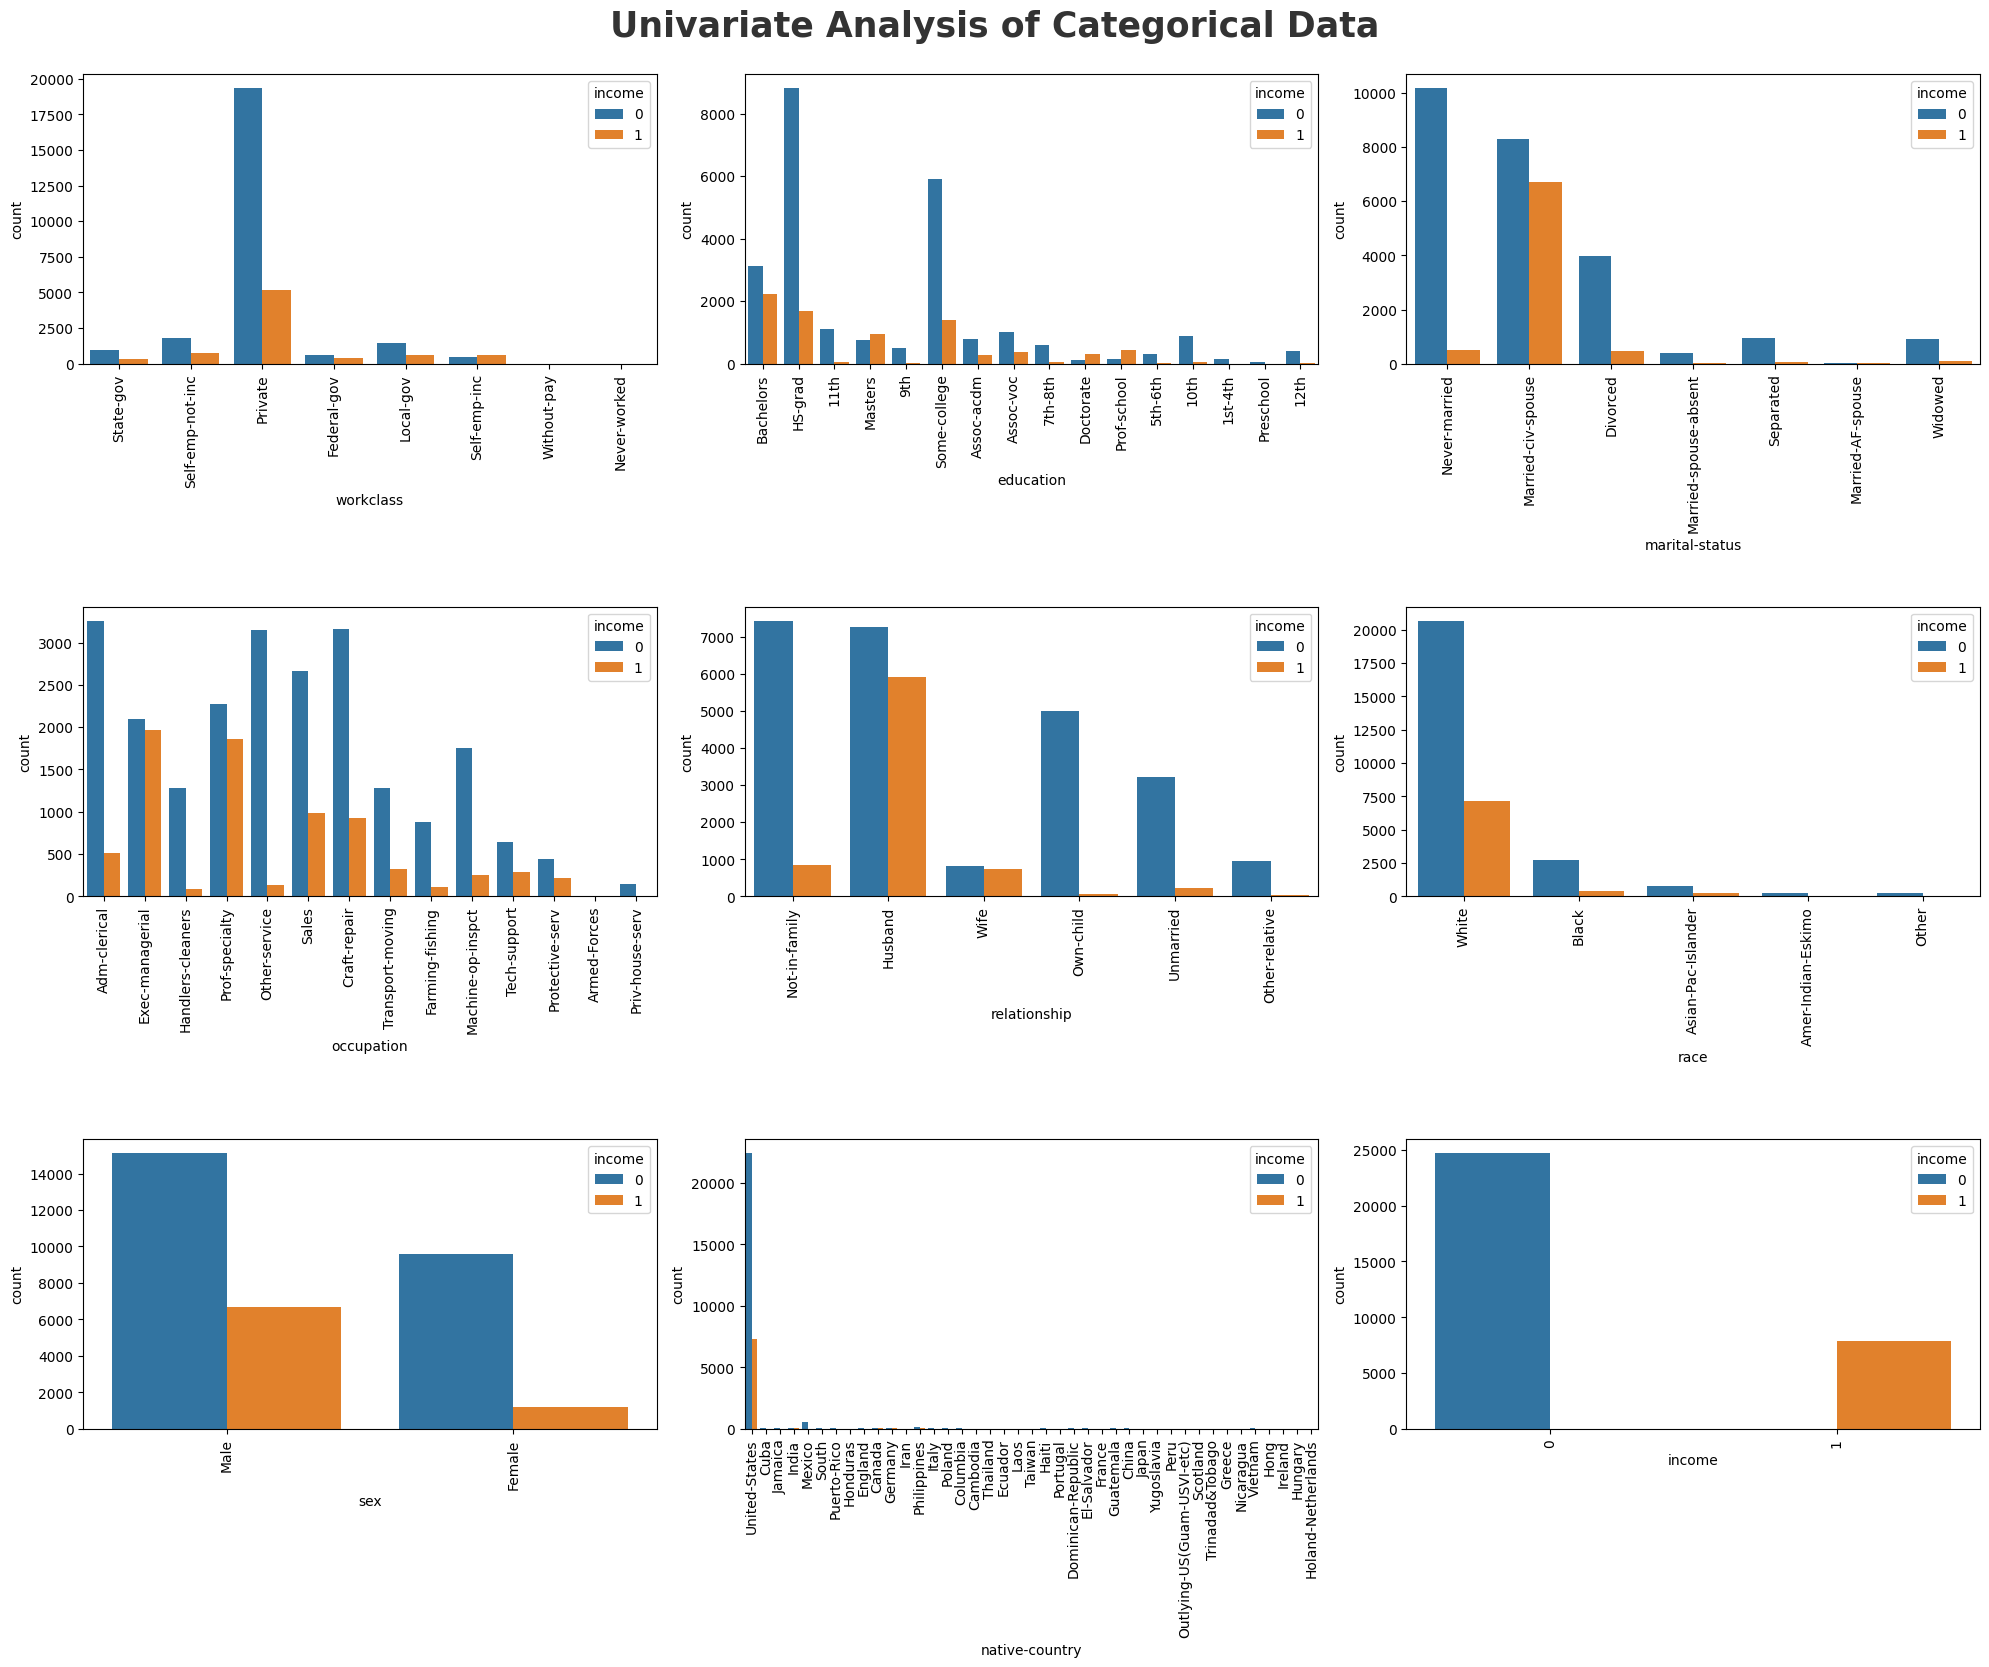

In [28]:
plt.figure(figsize=(20,25))
plt.suptitle("Univariate Analysis of Categorical Data", fontsize = 25, fontweight = "bold", alpha = 0.8, y=1)

for i in range(0, len(categorical_cols)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = df[categorical_cols[i]], data=df, hue="income", palette="tab10")
    plt.xlabel(categorical_cols[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [30]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [31]:
# Create a dictionary to map occupation values to new groups
occupation_map = {
    'Exec-managerial': 'Management',
    'Prof-specialty': 'Professional',
    'Other-service': 'Service',
    'Sales': 'Sales',
    'Craft-repair': 'Skilled',
    'Transport-moving': 'Skilled',
    'Handlers-cleaners': 'Skilled',
    'Farming-fishing': 'Skilled',
    'Machine-op-inspct': 'Skilled',
    'Adm-clerical': 'Other',
    'Tech-support': 'Other',
    'Protective-serv': 'Service',
    'Armed-Forces': 'Other',
    'Priv-house-serv': 'Service'
}

# Map the occupation values to new groups using the dictionary
df['occupation_group'] = df['occupation'].replace(occupation_map)

# Create a dictionary to map marital status values to new groups
marital_map = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Single',
    'Separated': 'Married',
    'Widowed': 'Single'
}

# Map the marital status values to new groups using the dictionary
df['marital_status_group'] = df['marital-status'].replace(marital_map)

# Define the relationship groups
relationship_groups = {
    'Husband': 'Spouse',
    'Wife': 'Spouse',
    'Own-child': 'Child',
    'Not-in-family': 'Family',
    'Unmarried': 'Family',
    'Other-relative': 'Family'
}

# Create a new column 'Relationship_Group' based on the defined groups
df['Relationship_Group'] = df['relationship'].map(relationship_groups)

In [32]:
# Create a new feature for native country groups
df['native_group'] = df['native-country'].apply(lambda x: 'US' if x == 'United-States' else 'non-US')

# Create a new feature for workclass groups
df['workclass_group'] = df['workclass'].apply(lambda x: 'Private' if x == 'Private' else 'Other')

# Create a new feature for race groups
df['race_group'] = df['race'].apply(lambda x: 'White' if x == 'White' else 'Other')

# Create a binary feature for groups
df['sex_group'] = df['sex'].map({'Male': 1, 'Female': 0})
df['native_group'] = df['native_group'].map({'US': 1, 'non-US': 0})
df['workclass_group'] = df['workclass_group'].map({'Private': 1, 'Other': 0})
df['race_group'] = df['race_group'].map({'White': 1, 'Other': 0})
df['marital_status_group'] = df['marital_status_group'].map({'Married': 1, 'Single': 0})

Creating new groups allows for reducing the dimensionality of the data. Instead of analyzing or visualizing individual values, we can focus on the higher-level groups, which can be more insightful and easier to work with.For example, in the case of occupation or marital status, you can group similar categories together, reducing the number of unique values and providing a more concise representation.

In [33]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,income,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,0,Other,0,Family,1,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,0,Management,1,Spouse,1,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,0,Skilled,0,Family,1,1,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,0,Skilled,1,Spouse,1,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,0,Professional,1,Spouse,0,1,0,0


In [34]:
# Fill the occupation_group with mode value
df['occupation_group'] = df['occupation_group'].fillna(df['occupation_group'].mode()[0])

In [35]:
# There is no need for these coloumns now so drop these coloumns
df = df.drop(["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], axis=1)

In [36]:
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group
0,39,77516,Bachelors,13,2174,0,40,0,Other,0,Family,1,0,1,1
1,50,83311,Bachelors,13,0,0,13,0,Management,1,Spouse,1,0,1,1
2,38,215646,HS-grad,9,0,0,40,0,Skilled,0,Family,1,1,1,1
3,53,234721,11th,7,0,0,40,0,Skilled,1,Spouse,1,1,0,1
4,28,338409,Bachelors,13,0,0,40,0,Professional,1,Spouse,0,1,0,0


In [37]:
# Create a dictionary to map education to new groups
education_mapping = {
    'Preschool': 'Primary',
    '1st-4th': 'Primary',
    '5th-6th': 'Primary',
    '7th-8th': 'Primary',
    '9th': 'Secondary',
    '10th': 'Secondary',
    '11th': 'Secondary',
    '12th': 'Secondary',
    'HS-grad' : 'High School Graduation',
    'Some-college': 'Some College',
    'Assoc-acdm': "Associate's Degree",
    'Assoc-voc': "Associate's Degree",
    'Bachelors': "Bachelor's Degree",
    'Masters': "Master's Degree",
    'Prof-school': 'Professional Degree',
    'Doctorate': 'Doctorate Degree'}

# Create a new column 'education_Group' based on the defined groups
df['education_group'] = df['education'].map(education_mapping)

In [38]:
# education and education-number represent same information
df = df.drop(['education-num', 'education'], axis = 1)

In [39]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,occupation_group,marital_status_group,Relationship_Group,native_group,workclass_group,race_group,sex_group,education_group
0,39,77516,2174,0,40,0,Other,0,Family,1,0,1,1,Bachelor's Degree
1,50,83311,0,0,13,0,Management,1,Spouse,1,0,1,1,Bachelor's Degree
2,38,215646,0,0,40,0,Skilled,0,Family,1,1,1,1,High School Graduation
3,53,234721,0,0,40,0,Skilled,1,Spouse,1,1,0,1,Secondary
4,28,338409,0,0,40,0,Professional,1,Spouse,0,1,0,0,Bachelor's Degree


In [152]:
df.to_csv("../data/clean_data.csv", index=False)